# Milestone 1: Perform EDA for movie dataset

In [26]:
# perform EDA

# import pandas & load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# load dataset into dataframe
df = pd.read_csv('/workspace/DS3001-Project1/Data/movie_dataset.csv',low_memory=False)

# load movie_dataset.csv
#df = pd.read_csv('movie_dataset.csv', low_memory=False)
df.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [9]:

print("Shape: \n", df.shape,'\n')
# Number of rows: 4803
# Number of Columns: 24

# Look at first few rows
print( df.head() )



Shape: 
 (4803, 24) 

   index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         

In [10]:

# print list of column names with data types:

for idx, (column, dtype) in enumerate(df.dtypes.items(), 1):
    print(f"{idx}. {column}: {dtype}")

1. index: int64
2. budget: int64
3. genres: object
4. homepage: object
5. id: int64
6. keywords: object
7. original_language: object
8. original_title: object
9. overview: object
10. popularity: float64
11. production_companies: object
12. production_countries: object
13. release_date: object
14. revenue: int64
15. runtime: float64
16. spoken_languages: object
17. status: object
18. tagline: object
19. title: object
20. vote_average: float64
21. vote_count: int64
22. cast: object
23. crew: object
24. director: object



# DIRECTORS


In [11]:

# Create a table showing the number of movies directed by each director
director_counts = df['director'].value_counts().to_frame().reset_index()
director_counts.columns = ['Director', 'Number of Movies Directed']
print(director_counts)
print( '\n' )


               Director  Number of Movies Directed
0      Steven Spielberg                         27
1           Woody Allen                         21
2       Martin Scorsese                         20
3        Clint Eastwood                         20
4          Ridley Scott                         16
...                 ...                        ...
2344  Timothy Bjorklund                          1
2345     Marcus Dunstan                          1
2346    Lorene Scafaria                          1
2347        Jeff Lowell                          1
2348   Brian Herzlinger                          1

[2349 rows x 2 columns]




Steven Spielberg has the highest movie count with a total of 27 movies directed. He's followed up by Woody Allen and Clint Eastwood.

In [12]:

# Create descriptive statistics table for movies per director:
director_counts = df['director'].value_counts()
descriptive_stats = director_counts.describe()
print("Descriptive Statistics for Number of Movies Per Director:")
print(descriptive_stats)


Descriptive Statistics for Number of Movies Per Director:
count    2349.000000
mean        2.031928
std         2.100398
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        27.000000
Name: count, dtype: float64


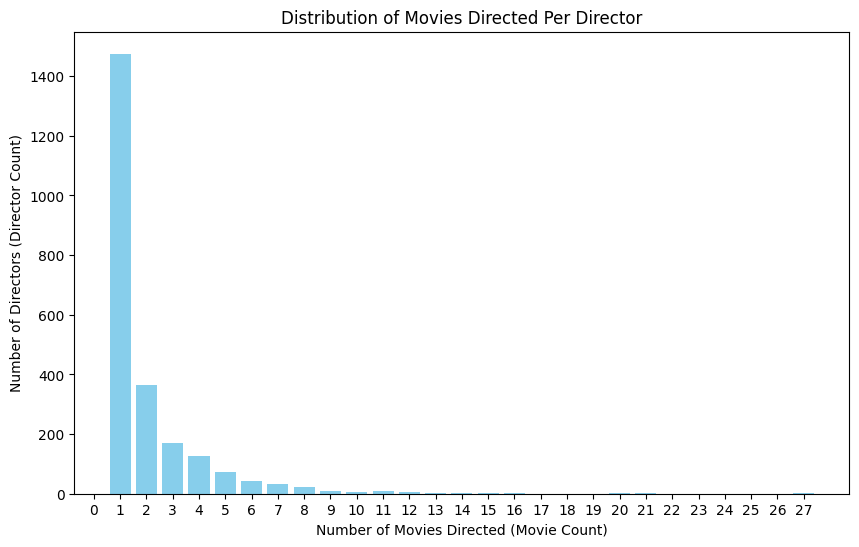

In [13]:

# Create a histogram showing the distribution of movies directed per director:
director_counts = df['director'].value_counts()
distribution = director_counts.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(distribution.index, distribution.values, color='skyblue')
plt.xlabel('Number of Movies Directed (Movie Count)')
plt.ylabel('Number of Directors (Director Count)')
plt.title('Distribution of Movies Directed Per Director')
plt.xticks(range(0, 28))
plt.show()
print( '\n' )


This histogram is right skewed, showing a large number of directors who directed only one movie.



```
# This is formatted as code
```



# MOVIE RUNTIME IN MINUTES


In [14]:

# Descriptive statistics for runtime:
runtime_table = df[ "runtime" ].describe()
print( "Descriptive statistics for movie runtime: \n", runtime_table )


Descriptive statistics for movie runtime: 
 count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64


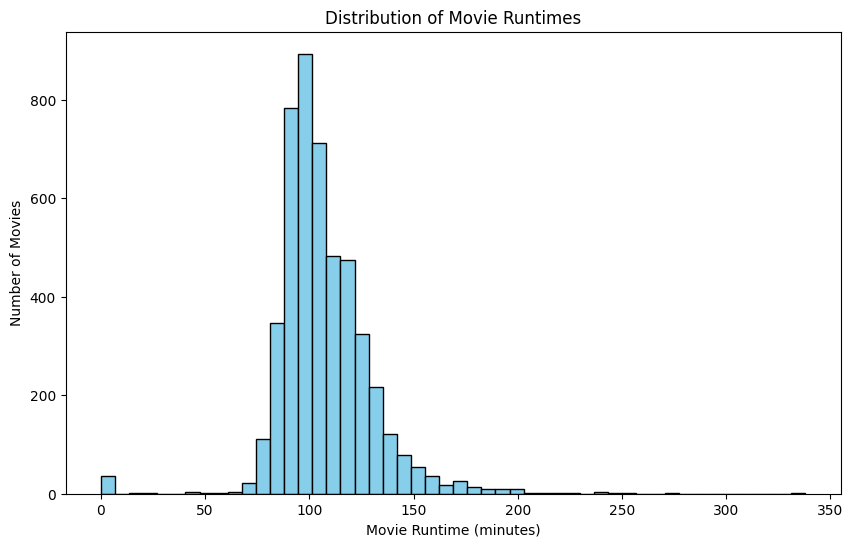

In [15]:

# Histogram for runtime:
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Runtimes')
plt.show()


The histogram for movie runtime appears uniform, with one peak at around 100 minutes. There is a cluster of outliers around the 0-10 minute mark.

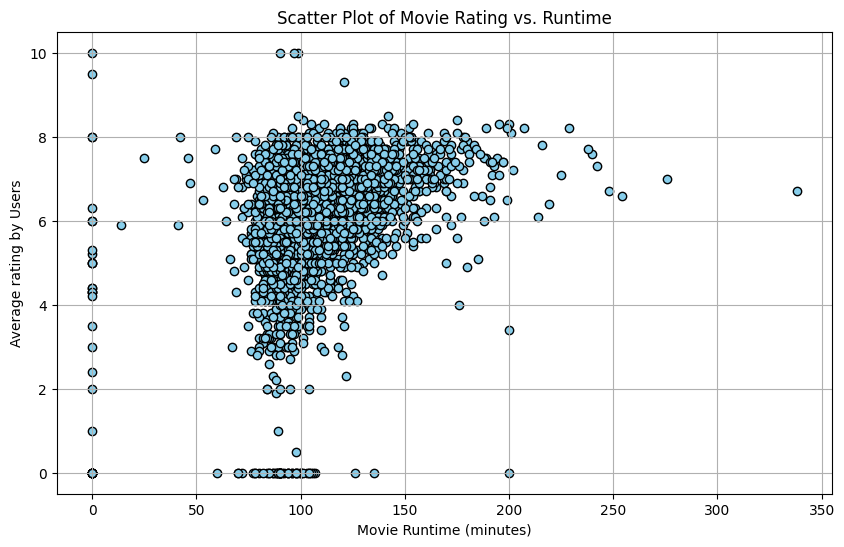

In [16]:

# Scatterplot for runtime vs. average rating:
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['vote_average'], color='skyblue', edgecolor='black')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Average rating by Users')
plt.title('Scatter Plot of Movie Rating vs. Runtime')
plt.grid(True)
plt.show()


Scatterplot appears nonlinear, indicating minimal correlation between runtime and user rating. It appears that movies with a very low runtime (near 0 minutes) exhibit virtually zero correlation between rating and runtime. Let's run a correlation test between runtime and rating for the entire dataset:

In [17]:

runtime_rating_correlation = df['runtime'].corr(df['vote_average'])
print(f"Correlation between Movie Runtime and User Rating: {runtime_rating_correlation:.2f}")
# movie rating and runtime have a positive correlation of 0.38

Correlation between Movie Runtime and User Rating: 0.38


# TOTAL REVENUE BY GENRE

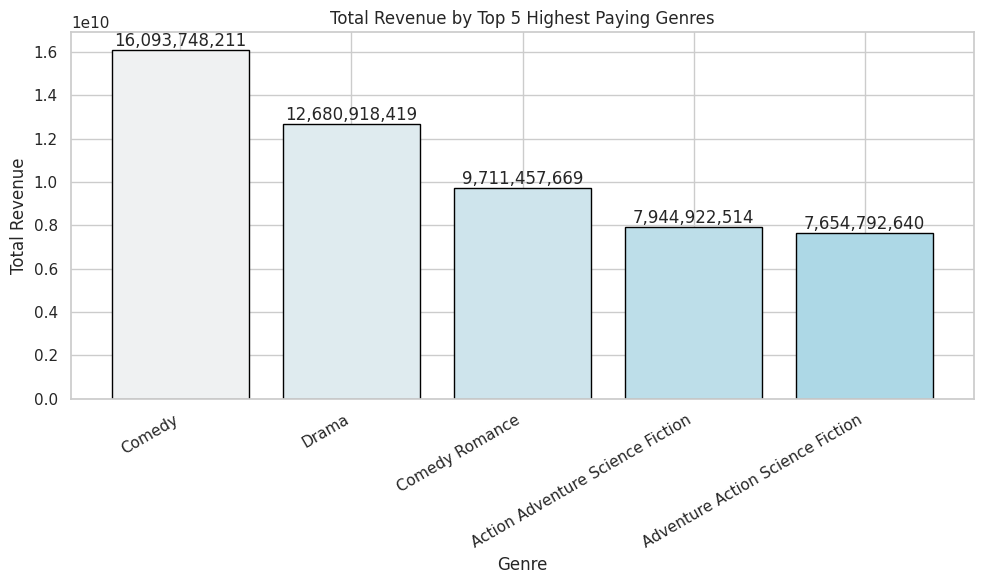

In [40]:
# Group by genres and sum the revenue
revenue_by_genre = df.groupby('genres')['revenue'].sum().reset_index()

# Sort by revenue in descending order and select the top 5
revenue_by_genre = revenue_by_genre.sort_values(by='revenue', ascending=False).head(5)

# Set theme
sns.set_theme(style="whitegrid")

# Create a color palette with shades of blue
colors = sns.light_palette("lightblue", n_colors=len(revenue_by_genre), as_cmap=False)

# Plot a bar chart for total revenue by the top 5 genres
plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_by_genre['genres'], revenue_by_genre['revenue'], color=colors, edgecolor='black')

# Curving the x-axis labels for better readability and add labels
plt.xticks(rotation=30, ha='right')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Top 5 Highest Paying Genres')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom')  # Add formatted revenue

plt.tight_layout()
plt.show()


Comedy and Drama seem to dominate the box office, which might suggest a broader audience appeal or a larger volume of content produced in these genres. The combination of action and science fiction appears in two different genre names, indicating that films in these genres are consistently high-grossing, suggesting a trend in audience preference for action-packed and visually engaging films

# TAGLINE LENGTH AND POPULARITY SCORE

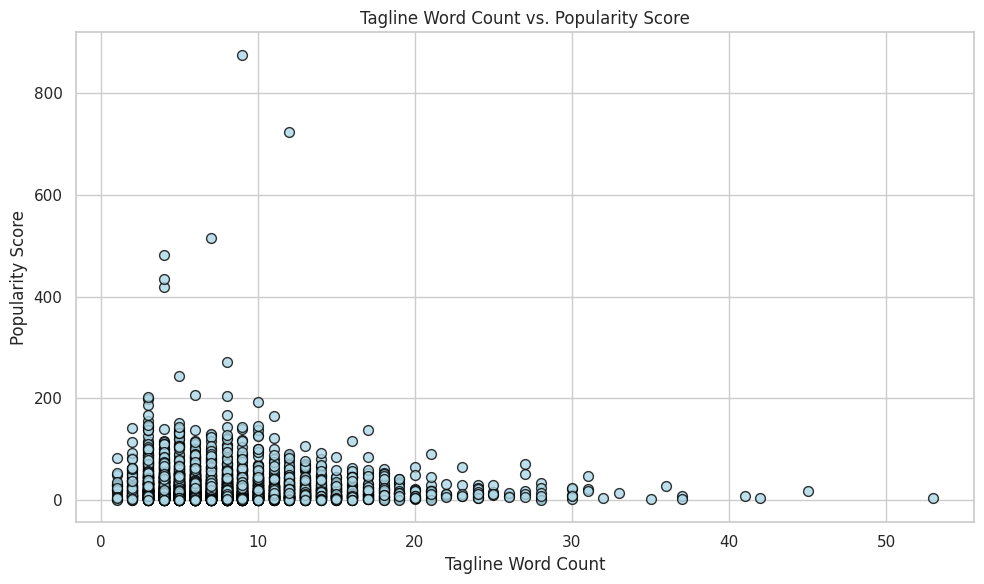

In [30]:
# Create a new column for the number of words in the tagline
df['tagline_word_count'] = df['tagline'].str.split().str.len()

# Plotting a scatter plot of tagline word count vs. popularity score
plt.figure(figsize=(10, 6))
plt.scatter(df['tagline_word_count'], df['popularity'], alpha=0.8, color='lightblue', edgecolor='black', s=50)

# Add labels and title and display
plt.xlabel('Tagline Word Count')
plt.ylabel('Popularity Score')
plt.title('Tagline Word Count vs. Popularity Score')
plt.tight_layout()
plt.show()

Correlation between longer tagline word counts with lower popularity scores. Potential interpretation being that shorter taglines are catchier, and therefore more capitvating and alluring to viewers.  